In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib as mpl
import MDAnalysis.analysis.rms as rms
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

In [2]:
traj = "mhp1_dims_occ2if_mash_E-6_001.dcd" #concatenated trajectory dcd
u = mda.Universe("2jln_r10_g470_c22.psf", traj)
traj_len = len(u.trajectory)

In [3]:
d1 = []
d2 = []
d3 = []
    
for ts in u.trajectory:
    b_ec = u.select_atoms("resid 38:40") #select bundle for ec_thin comparison
    ec_thin = u.select_atoms("resid 351:353") #select extracellular thin gate
    b_ic = u.select_atoms("resid 152:154") #sic
    ic_thin = u.select_atoms("resid 220:222") #select intracellular thin gate
    b_tg = u.select_atoms("resid 29 or resid 32") #sic
    thick = u.select_atoms("resid 300 or resid 303:304") #select thick gate
    
    d1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
    d2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
    d3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
    d1_b = np.linalg.norm(d1_a)
    d2_b = np.linalg.norm(d2_a)
    d3_b = np.linalg.norm(d3_a)
    
    d1.append(d1_b) #Ec_thin
    d2.append(d2_b) #Ic_thin
    d3.append(d3_b) #Thick Gate

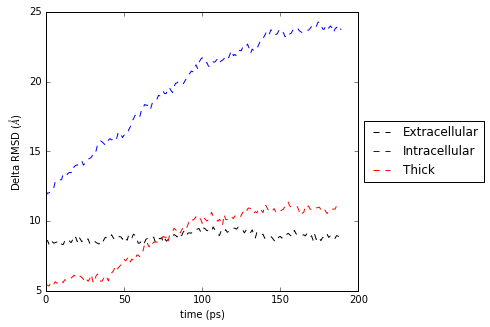

In [6]:
import matplotlib.pyplot as plt
time = len(u.trajectory)
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
ax.plot(d1, 'k--', label = "Extracellular")
ax.plot(d2, 'b--', label = "Intracellular")
ax.plot(d3, 'r--', label = "Thick")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Delta RMSD ($\AA$)")
fig.savefig("mhp1_gate_tseries_occ2if.pdf")